In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#uploading the dataset
df = pd.read_csv('/content/drive/MyDrive/accidents/data/US_Accidents_March23.csv')

In [4]:
#displaying all the columns
pd.set_option('display.max_columns', None)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
#seeing the dtype for each column in the data
df.info()

In [6]:
#seeing how many nulls are in each column
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [7]:
#we have class imbalanced
df['Severity'].value_counts()

2    6156981
3    1299337
4     204710
1      67366
Name: Severity, dtype: int64

In [8]:
#seeing how many countries we are working with
df['Country'].unique()

array(['US'], dtype=object)

In [9]:
#dropping columns we won't be using
df = df.drop(columns=['Source', 'Country', 'Airport_Code', 'Timezone', 'Wind_Direction'])

In [10]:
#making sure the format for all the values are the same
#deleting the value after the .
df['Start_Time'] = [str(value).split('.')[0] for value in df['Start_Time']]
df['End_Time'] = [str(value).split('.')[0] for value in df['End_Time']]

In [11]:
# df.loc[3639775, 'Start_Time'] = '2017-07-23 04:21:01'
# df.loc[3639776, 'Start_Time'] = '2017-07-23 05:18:46'

In [12]:
#making sure it's removed
df['End_Time'][3639777]

'2017-07-23 11:36:01'

In [13]:
#changing the format to datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y-%m-%d %H:%M:%S")
df['End_Time'] = pd.to_datetime(df['End_Time'], format="%Y-%m-%d %H:%M:%S")
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format="%Y-%m-%d %H:%M:%S")

In [14]:
#checking to see the Start_Time, End_Time, and Weather_Timestamp are datetime types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 41 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Weather_Timestamp      datetime64[ns]
 16  Temperature(F)         float64       
 17  Wind_Chill(F)          float64       
 18  Humidity(%)           

In [15]:
#creating a new column that shows how long the impact of the accident had on traffic
df['Duration'] = df['End_Time'] - df['Start_Time']

## Duration of the Accidents

In [16]:
df['Duration'].value_counts()

0 days 06:00:00    369307
0 days 00:30:00    116096
0 days 00:45:00     70075
0 days 01:15:00     61374
0 days 01:00:00     61173
                    ...  
0 days 19:59:12         1
6 days 08:00:00         1
1 days 04:06:30         1
3 days 23:08:45         1
4 days 08:37:14         1
Name: Duration, Length: 74038, dtype: int64

In [17]:
#seeing the longest duration time for the accidents
df['Duration'].sort_values(ascending=False)

4774200   1953 days 10:19:00
5015643   1953 days 10:19:00
5358306   1553 days 01:25:45
5035157   1553 days 00:35:32
4540426   1553 days 00:35:32
                 ...        
5720486      0 days 00:02:30
5455635      0 days 00:02:00
5288952      0 days 00:02:00
3184392      0 days 00:01:55
2555552      0 days 00:01:13
Name: Duration, Length: 7728394, dtype: timedelta64[ns]

In [18]:
#looking into an accident that has duration time of ~4 years!!
df[df['Duration'] == '1553 days 01:25:45']

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
5358306,A-5399002,2,2018-04-19 09:24:00,2022-07-20 10:49:45,40.894453,-72.470099,40.895494,-72.457948,0.639,NYSDOT - Region 10: Crash on NY 27 eastbound a...,Inlet Rd W,Southampton,Suffolk,NY,11968,2018-04-19 09:20:00,41.0,37.1,91.0,29.65,10.0,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1553 days 01:25:45


In [19]:
df['Description'][5358306]

'NYSDOT - Region 10: Crash on NY 27 eastbound area of Exit 66 - North Shore Highway; CR 39; North Shore Road (Suffolk) left lane closed'

In [20]:
#seeing why we have an accident that lasted for 6 years!!
df[df.Duration == '1953 days 10:19:00']

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
4774200,A-4810425,2,2016-10-21 07:26:00,2022-02-25 17:45:00,39.722369,-75.537494,39.717247,-75.549731,0.740,Construction on I-495 SB near TERMINAL AVE Rig...,I-495 S,Wilmington,New Castle,DE,19801,2016-10-21 07:46:00,66.2,NaN,94.0,29.78,1.8,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1953 days 10:19:00
5015643,A-5053641,2,2016-10-21 07:26:00,2022-02-25 17:45:00,39.721273,-75.538913,39.718263,-75.543893,0.337,Construction on I-495 SB near TERMINAL AVE Rig...,I-495,Wilmington,New Castle,DE,19801,2016-10-21 07:46:00,66.2,NaN,94.0,29.78,1.8,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1953 days 10:19:00


In [21]:
df['Description'][4774200]
#Must be an error while inputting the data because its unfathomable to believe the delay lasted for 6 years

'Construction on I-495 SB near TERMINAL AVE Right lane blocked. Expect delays.'

## Number of Accidents per Hour

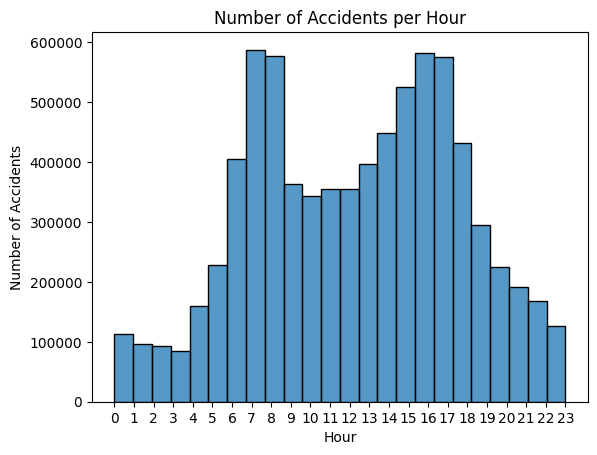

In [22]:
#The number of accidents throughout the day
sns.histplot(data=df, x=df.Start_Time.dt.hour, bins=24) #, kde=False, norm_hist=False); #extracting the hour from the timestamp

# Set the tick locations
plt.xticks(range(0, 24))  # Set ticks every hour

plt.title('Number of Accidents per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show();

We can see a big uptick in accidents during the morning/afternoon rush hour, coinciding with the times when most people are commuting.

## Number of Accidents per Month

In [23]:
#creating new columns for the month
df['Month'] = df.Start_Time.dt.month

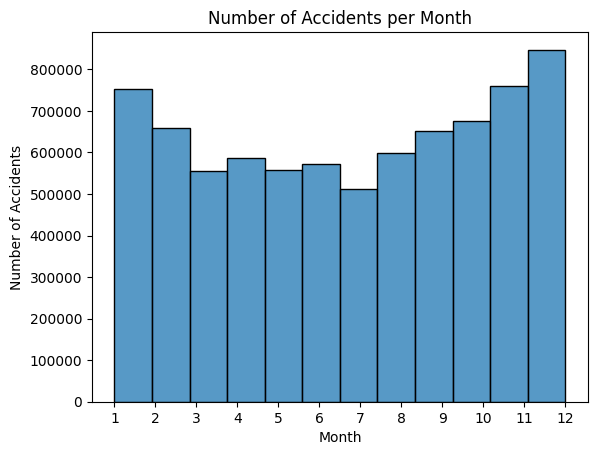

In [24]:
#The number of accidents per month
sns.histplot(data=df, x=df.Start_Time.dt.month, bins=12) #, kde=False, norm_hist=False) #extracting the hour from the timestamp

#Set ticks for each month
plt.xticks(range(1, 13, 1))

plt.title('Number of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show();

As observed, there is a surge in accidents towards the end of the year, aligning with increased holiday travel.

In [25]:
df['Month'].value_counts()

12    847343
11    760165
1     751946
10    675130
2     658984
9     651381
8     599666
4     587300
6     571373
5     558176
3     554595
7     512335
Name: Month, dtype: int64

In [26]:
df.groupby('Month').size()

Month
1     751946
2     658984
3     554595
4     587300
5     558176
6     571373
7     512335
8     599666
9     651381
10    675130
11    760165
12    847343
dtype: int64

### Accidents by Weather Condition

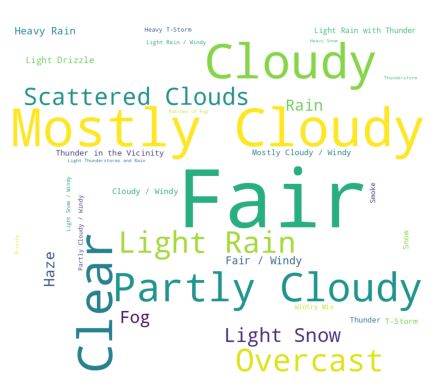

In [27]:
#using a wordcloud to visual the frequency of each word from the weather condition column
data = df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(width = 900, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

Interestingly, the majority of accidents occur under fair/clear or cloudy weather conditions rather than during snow or rain. This suggests that most people may prefer to avoid driving during inclement weather conditions.

### States with the most accidents

In [28]:
#getting the top 10 states with the most number of accidents
states_by_accident = df.State.value_counts()
states_by_accident[:10]

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: State, dtype: int64

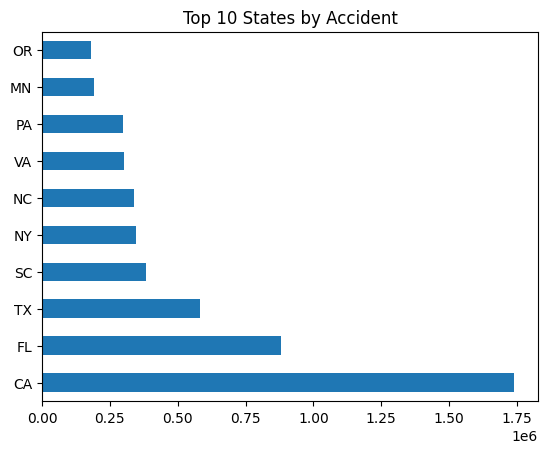

In [29]:
states_by_accident[:10].plot(kind = 'barh', title='Top 10 States by Accident');

# Using new dataframe, new_df

In [30]:
#only using the top 6 states with the most accidents

# Create a list of states to keep
states_to_keep = ['CA', 'FL', 'TX', 'SC', 'NY', 'NC']

# Create a new DataFrame by filtering the rows
new_df = df[df['State'].isin(states_to_keep)]

In [31]:
#checking to see how many null values after dropping most states
new_df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1849447
End_Lng                  1849447
Distance(mi)                   0
Description                    5
Street                      5875
City                          72
County                         0
State                          0
Zipcode                     1367
Weather_Timestamp          55660
Temperature(F)             81130
Wind_Chill(F)            1188155
Humidity(%)                86285
Pressure(in)               65381
Visibility(mi)             75537
Wind_Speed(mph)           312569
Precipitation(in)        1244218
Weather_Condition          72753
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway   

### The Cities within the Top 6 States with the Highest Number of Accidents

In [32]:
#getting the top cities with the number of accidents
cities_by_accident = new_df.City.value_counts()
cities_by_accident

Miami          186768
Houston        169428
Los Angeles    156491
Charlotte      138345
Dallas         130396
                ...  
River Oaks          1
Tolar               1
Boyd                1
Big Sandy           1
Cedar Point         1
Name: City, Length: 4482, dtype: int64

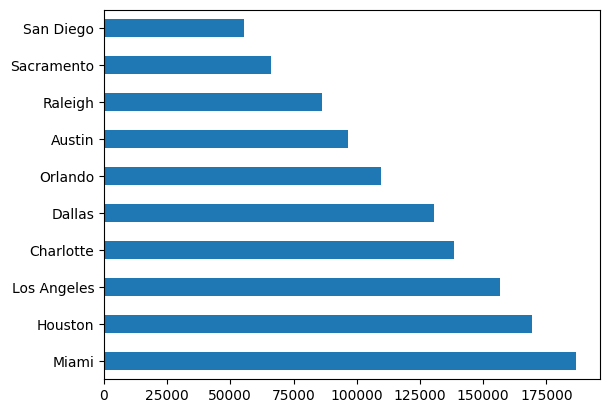

In [33]:
cities_by_accident[:10].plot(kind = 'barh');

In [34]:
new_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Duration,Month
count,4.273178e+06,4.273178e+06,4.273178e+06,2.423731e+06,2.423731e+06,4.273178e+06,4.192048e+06,3.085023e+06,4.186893e+06,4.207797e+06,4.197641e+06,3.960609e+06,3.028960e+06,4273178,4.273178e+06
mean,2.168610e+00,3.368302e+01,-9.837515e+01,3.359181e+01,-9.949935e+01,4.577582e-01,6.631451e+01,6.473455e+01,6.409616e+01,2.973442e+01,9.188709e+00,7.423251e+00,8.342249e-03,0 days 02:12:12.617144663,6.690366e+00
std,4.282122e-01,4.280859e+00,1.852925e+01,4.492968e+00,1.900653e+01,1.434502e+00,1.561716e+01,1.751587e+01,2.268640e+01,6.158423e-01,2.315648e+00,5.432697e+00,1.283089e-01,2 days 17:25:01.597568843,3.628719e+00
min,1.000000e+00,2.455480e+01,-1.243750e+02,2.456601e+01,-1.244002e+02,0.000000e+00,-7.780000e+01,-8.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0 days 00:01:55,1.000000e+00
25%,2.000000e+00,3.025212e+01,-1.182230e+02,2.992466e+01,-1.183003e+02,0.000000e+00,5.590000e+01,5.400000e+01,4.800000e+01,2.962000e+01,1.000000e+01,3.500000e+00,0.000000e+00,0 days 00:33:30,3.000000e+00
50%,2.000000e+00,3.402754e+01,-9.561913e+01,3.402465e+01,-9.681045e+01,2.000000e-02,6.800000e+01,6.700000e+01,6.600000e+01,2.991000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0 days 01:15:00,7.000000e+00
75%,2.000000e+00,3.611967e+01,-8.083998e+01,3.677185e+01,-8.077439e+01,3.380000e-01,7.800000e+01,7.800000e+01,8.300000e+01,3.004000e+01,1.000000e+01,1.000000e+01,0.000000e+00,0 days 02:06:43,1.000000e+01
max,4.000000e+00,4.500189e+01,-7.186103e+01,4.499732e+01,-7.194368e+01,3.336300e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,2.400000e+01,1553 days 01:25:45,1.200000e+01


### Distributions of weather related columns

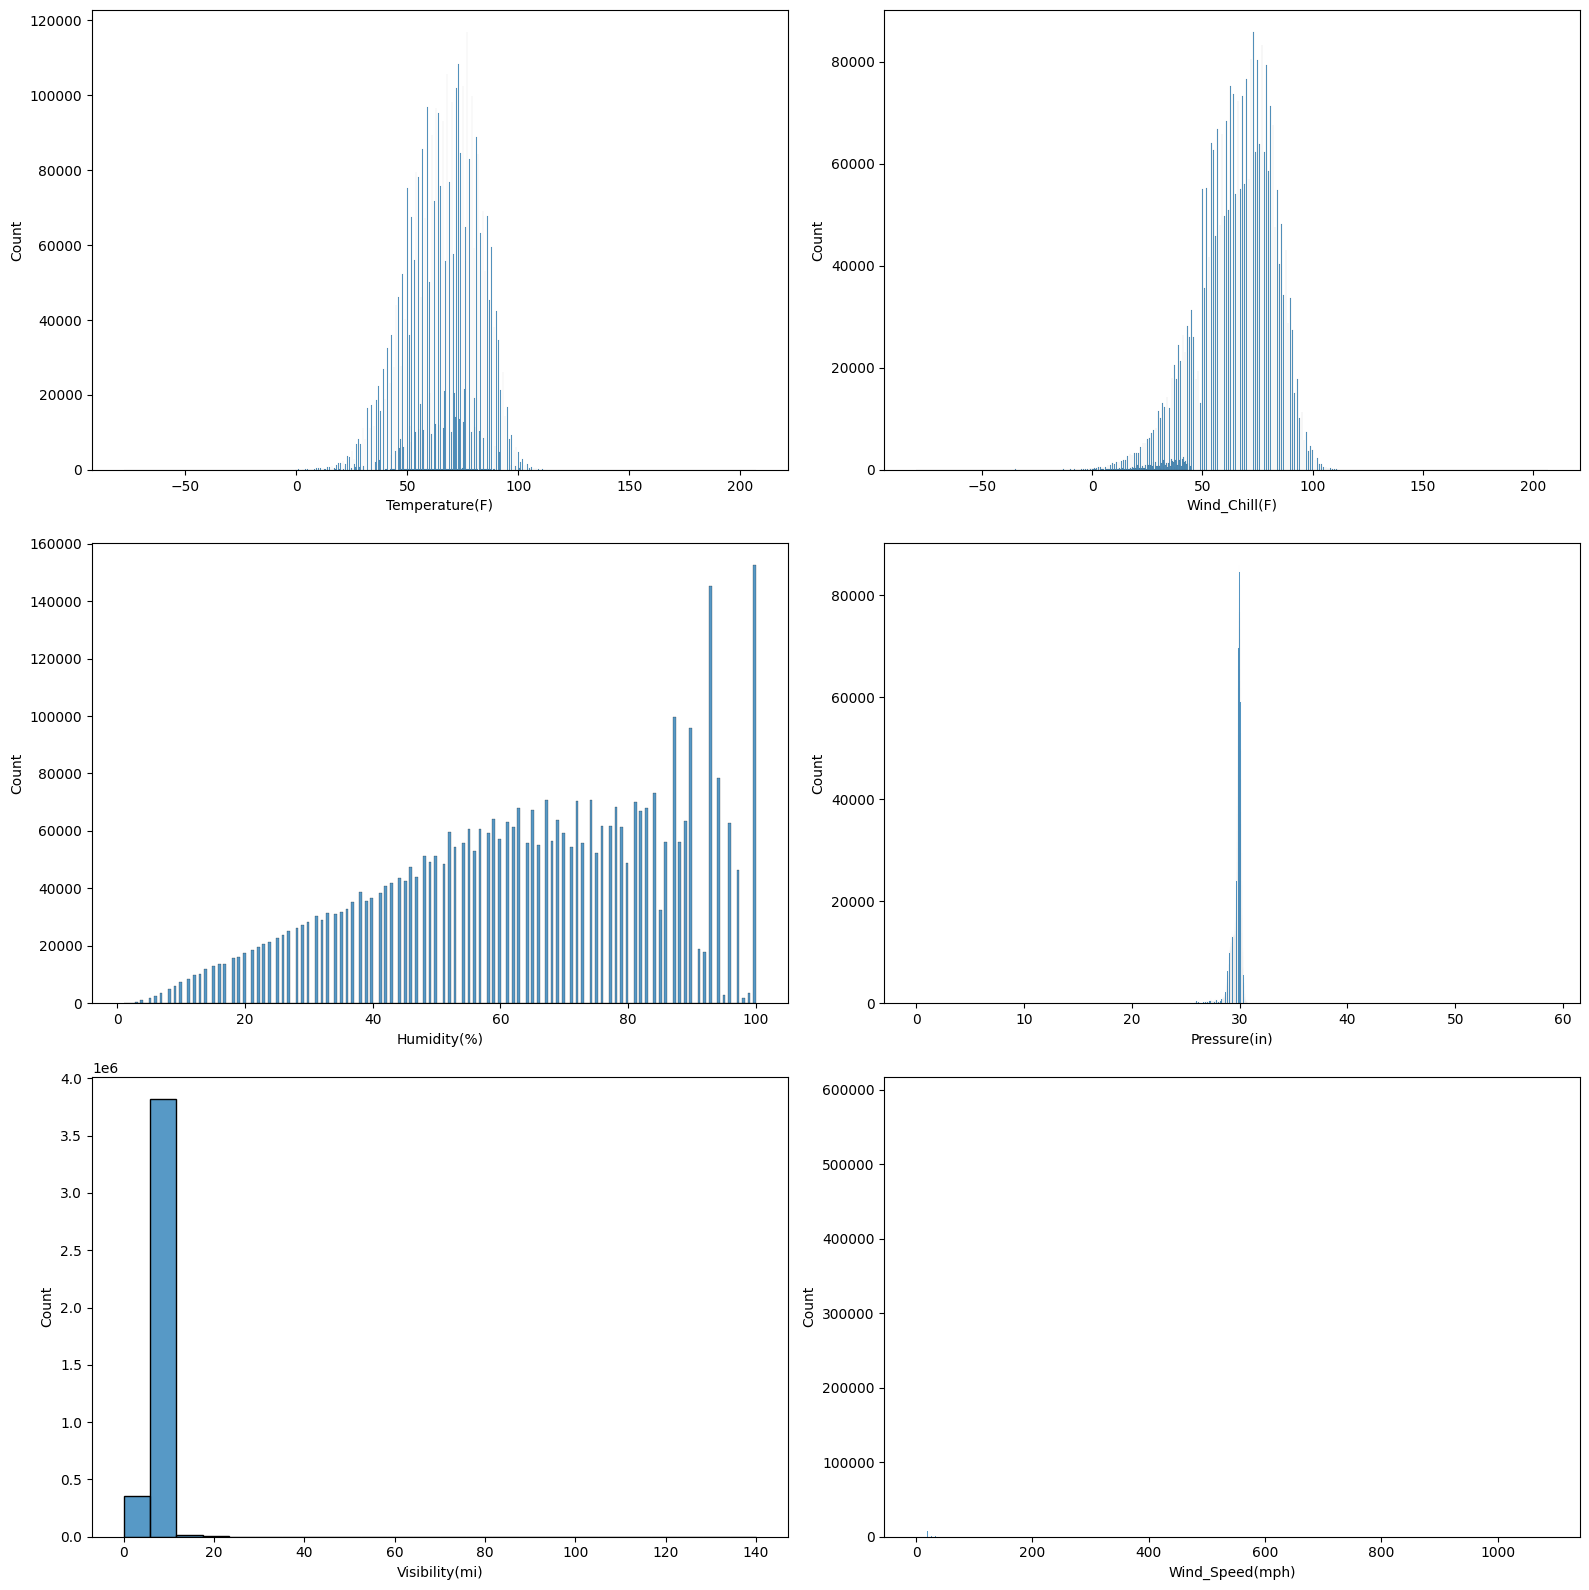

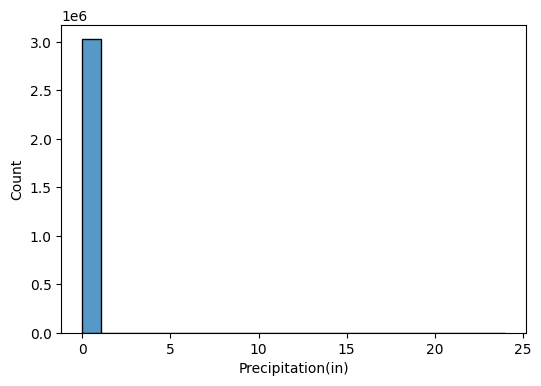

In [35]:
#examining the distribution of all the weather related columns to see what to fill the missing values with

fig, axes = plt.subplots(3, 2, figsize=(16, 16))

sns.histplot(data=new_df, x='Temperature(F)', bins='auto', ax=axes[0,0])
sns.histplot(data=new_df, x='Wind_Chill(F)', bins='auto', ax=axes[0,1])
sns.histplot(data=new_df, x='Humidity(%)', bins='auto', ax=axes[1,0])
sns.histplot(data=new_df, x='Pressure(in)', bins='auto', ax=axes[1,1])
sns.histplot(data=new_df, x='Visibility(mi)', bins='auto', ax=axes[2,0])
sns.histplot(data=new_df, x='Wind_Speed(mph)', bins='auto', ax=axes[2,1])
plt.tight_layout()

plt.figure(figsize=(6, 4))
sns.histplot(data=new_df, x='Precipitation(in)', bins='auto')

plt.show()

In [36]:
#the plot for Wind Speed looks funny, lets take a closer look
new_df.sort_values(by='Wind_Speed(mph)', ascending=False)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Month
6274606,A-6320814,2,2021-12-16 12:31:00,2021-12-16 14:44:36,37.328360,-120.559242,37.328225,-120.558982,0.017,Accident from N Gurr Rd to Ashby Rd.,Ashby Rd,Atwater,Merced,CA,95301-5406,2021-12-16 12:45:00,50.0,50.0,100.0,29.91,10.0,1087.0,0.0,Cloudy / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 02:13:36,12
7092904,A-7142243,2,2020-03-28 14:49:27,2020-03-28 16:09:25,27.209430,-80.333700,27.209430,-80.333700,0.000,At SE Becker Rd/Exit 138 - Earlier accident.,SW Becker Rd,Port Saint Lucie,St. Lucie,FL,34953,2020-03-28 14:55:00,84.0,84.0,51.0,30.06,7.0,984.0,0.0,Fair / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 01:19:58,3
114647,A-114654,3,2016-06-13 20:30:47,2016-06-13 21:15:47,34.266048,-118.450768,NaN,NaN,0.000,Accident on I-5 Northbound near Exits 156A 156...,Ronald Reagan Fwy W,Mission Hills,Los Angeles,CA,91345,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,822.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,0 days 00:45:00,6
114640,A-114647,2,2016-06-13 20:19:08,2016-06-13 21:04:08,34.266048,-118.467438,NaN,NaN,0.000,Accident on CA-118 Westbound before Exits 42A ...,Ronald Reagan Fwy W,Mission Hills,Los Angeles,CA,91345,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,822.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,0 days 00:45:00,6
114588,A-114595,3,2016-06-13 18:44:57,2016-06-13 19:29:57,34.320553,-118.495262,NaN,NaN,0.000,Accident on I-5 Trk Northbound near I-5. On th...,I-5 N,Sylmar,Los Angeles,CA,91342,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,822.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:45:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727583,A-7776951,2,2019-08-22 09:01:20,2019-08-22 09:29:38,27.999900,-82.335570,28.002780,-82.320840,0.920,At I-75/Exit 9 - Accident. Left lane blocked.,I-4 E,Tampa,Hillsborough,FL,33610,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:28:18,8
7727610,A-7776978,2,2019-08-22 16:54:48,2019-08-22 17:22:17,27.981630,-82.285930,27.981630,-82.285930,0.000,At Parsons Ave - Accident.,S Parsons Ave,Seffner,Hillsborough,FL,33584-4504,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 00:27:29,8
7727934,A-7777302,2,2019-08-22 15:01:34,2019-08-22 15:31:27,34.148600,-118.072990,34.148260,-118.075570,0.149,Between Michillinda Ave and Rosemead Blvd - Ac...,Foothill Fwy W,Pasadena,Los Angeles,CA,91107,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:29:53,8
7728066,A-7777434,4,2019-08-23 17:28:24,2019-08-23 17:55:48,27.965090,-82.447270,27.968840,-82.453370,0.454,Ramp closed to I-4/Exit 45 - Road closed due t...,I-4 W,Tampa,Hillsborough,FL,33605,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:27:24,8


In [37]:
#locating the values that are greater than 100 then dividing them by 10 if they are
new_df['Wind_Speed(mph)'] = new_df.loc[new_df['Wind_Speed(mph)'] > 100, 'Wind_Speed(mph)'] / 10

<ipython-input-37-78c18a75bec9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Wind_Speed(mph)'] = new_df.loc[new_df['Wind_Speed(mph)'] > 100, 'Wind_Speed(mph)'] / 10


In [38]:
#checking to see that those values have been updated
new_df.sort_values(by='Wind_Speed(mph)', ascending=False)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Month
6274606,A-6320814,2,2021-12-16 12:31:00,2021-12-16 14:44:36,37.328360,-120.559242,37.328225,-120.558982,0.017,Accident from N Gurr Rd to Ashby Rd.,Ashby Rd,Atwater,Merced,CA,95301-5406,2021-12-16 12:45:00,50.0,50.0,100.0,29.91,10.0,108.70,0.0,Cloudy / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 02:13:36,12
7092904,A-7142243,2,2020-03-28 14:49:27,2020-03-28 16:09:25,27.209430,-80.333700,27.209430,-80.333700,0.000,At SE Becker Rd/Exit 138 - Earlier accident.,SW Becker Rd,Port Saint Lucie,St. Lucie,FL,34953,2020-03-28 14:55:00,84.0,84.0,51.0,30.06,7.0,98.40,0.0,Fair / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 01:19:58,3
114633,A-114640,3,2016-06-13 20:06:45,2016-06-13 20:51:45,34.247803,-118.425835,NaN,NaN,0.000,Accident on I-5 Southbound before Exit 154 Osb...,Golden State Fwy S,Pacoima,Los Angeles,CA,91331,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,82.28,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,0 days 00:45:00,6
114588,A-114595,3,2016-06-13 18:44:57,2016-06-13 19:29:57,34.320553,-118.495262,NaN,NaN,0.000,Accident on I-5 Trk Northbound near I-5. On th...,I-5 N,Sylmar,Los Angeles,CA,91342,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,82.28,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:45:00,6
114647,A-114654,3,2016-06-13 20:30:47,2016-06-13 21:15:47,34.266048,-118.450768,NaN,NaN,0.000,Accident on I-5 Northbound near Exits 156A 156...,Ronald Reagan Fwy W,Mission Hills,Los Angeles,CA,91345,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,82.28,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,0 days 00:45:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,NaN,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:28:36,8
7728390,A-7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,NaN,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:26:53,8
7728391,A-7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,NaN,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:28:28,8
7728392,A-7777760,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,NaN,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:29:21,8


In [39]:
#taking the mean of each column
mean_value_temp = new_df['Temperature(F)'].mean()
mean_value_wind_chill = new_df['Wind_Chill(F)'].mean()
mean_value_humid = new_df['Humidity(%)'].mean()
mean_value_press = new_df['Pressure(in)'].mean()
mean_value_vis = new_df['Visibility(mi)'].mean()
mean_value_wind_speed = new_df['Wind_Speed(mph)'].mean()
mean_value_precip = new_df['Precipitation(in)'].mean()

#filling in the null values with the mean values
new_df['Temperature(F)'].fillna(value=mean_value_temp, inplace=True)
new_df['Wind_Chill(F)'].fillna(value=mean_value_wind_chill, inplace=True)
new_df['Humidity(%)'].fillna(value=mean_value_humid, inplace=True)
new_df['Pressure(in)'].fillna(value=mean_value_press, inplace=True)
new_df['Visibility(mi)'].fillna(value=mean_value_vis, inplace=True)
new_df['Wind_Speed(mph)'].fillna(value=mean_value_wind_speed,inplace=True)
new_df['Precipitation(in)'].fillna(value=mean_value_precip, inplace=True)

<ipython-input-39-34f6750243dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Temperature(F)'].fillna(value=mean_value_temp, inplace=True)
<ipython-input-39-34f6750243dd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Wind_Chill(F)'].fillna(value=mean_value_wind_chill, inplace=True)
<ipython-input-39-34f6750243dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Humidity(%)'].fillna(value=mean_value_humi

In [40]:
#checking to see if the columns above are updated
new_df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1849447
End_Lng                  1849447
Distance(mi)                   0
Description                    5
Street                      5875
City                          72
County                         0
State                          0
Zipcode                     1367
Weather_Timestamp          55660
Temperature(F)                 0
Wind_Chill(F)                  0
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition          72753
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway   

In [41]:
#dropping more columns that aren't needed (there are too many nulls and we have the start location)
new_df = new_df.drop(columns=['End_Lat', 'End_Lng'])

In [42]:
#renaming the columns
new_df = new_df.rename(columns={'Sunrise_Sunset':'Sunset'})

In [43]:
new_df['Weather_Condition'].unique()

array(['Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy', 'Overcast',
       'Scattered Clouds', 'Light Rain', nan, 'Mist', 'Smoke', 'Fog',
       'Patches of Fog', 'Rain', 'Light Drizzle', 'Heavy Rain',
       'Shallow Fog', 'Light Snow', 'Snow', 'Light Freezing Fog',
       'Light Haze', 'Light Thunderstorms and Rain', 'Light Rain Showers',
       'Thunderstorms and Rain', 'Fair', 'Cloudy', 'Volcanic Ash',
       'Blowing Sand', 'Drizzle', 'Blowing Dust / Windy',
       'Widespread Dust', 'Fair / Windy', 'Rain Showers',
       'Mostly Cloudy / Windy', 'Light Rain / Windy', 'Hail',
       'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Light Freezing Rain',
       'Heavy Snow', 'Light Freezing Drizzle', 'Light Ice Pellets',
       'Ice 

In [44]:
#replacing the values into 5 categories
#Rain, Snow, Low Visibility, Clear, Cloudy
new_df["Weather_Condition"] = new_df["Weather_Condition"].replace({'Clear':'Clear', 'Partly Cloudy':'Cloudy', 'Haze':'Low Visibility',
                                                                   'Mostly Cloudy':'Cloudy', 'Overcast':'Cloudy','Scattered Clouds':'Cloudy',
                                                                   'Light Rain':'Rain', 'Mist':'Low Visibility', 'Smoke':'Low Visibility',
                                                                   'Fog':'Low Visibility', 'Patches of Fog':'Low Visibility',
                                                                   'Rain':'Rain', 'Light Drizzle':'Rain', 'Heavy Rain':'Rain',
                                                                   'Shallow Fog':'Low Visibility', 'Light Snow':'Snow', 'Snow':'Snow',
                                                                   'Light Freezing Fog':'Low Visibility', 'Light Haze':'Low Visibility',
                                                                   'Light Thunderstorms and Rain':'Rain', 'Light Rain Showers':'Rain',
                                                                   'Thunderstorms and Rain':'Rain', 'Fair':'Clear', 'Cloudy':'Cloudy',
                                                                   'Volcanic Ash':'Low Visibility', 'Blowing Sand':'Low Visibility',
                                                                   'Drizzle':'Rain', 'Blowing Dust / Windy':'Low Visibility',
                                                                   'Widespread Dust':'Low Visibility', 'Fair / Windy':'Clear',
                                                                   'Rain Showers':'Rain', 'Mostly Cloudy / Windy':'Cloudy',
                                                                   'Light Rain / Windy':'Rain', 'Hail':'Snow', 'Heavy Drizzle':'Rain',
                                                                   'Showers in the Vicinity':'Rain', 'Thunderstorm':'Rain',
                                                                   'Light Rain Shower':'Rain', 'Light Rain with Thunder':'Rain',
                                                                   'Partly Cloudy / Windy':'Cloudy', 'Thunder in the Vicinity':'Rain',
                                                                   'T-Storm':'Rain', 'Heavy Thunderstorms and Rain':'Rain',
                                                                   'Thunder':'Rain', 'Heavy T-Storm':'Rain', 'Funnel Cloud':'Cloudy',
                                                                   'Heavy T-Storm / Windy':'Rain', 'Light Freezing Rain':'Rain',
                                                                   'Heavy Snow':'Snow', 'Light Freezing Drizzle':'Rain',
                                                                   'Light Ice Pellets':'Snow', 'Ice Pellets':'Snow',
                                                                   'Snow Grains':'Snow', 'Light Fog':'Low Visibility',
                                                                   'Blowing Snow':'Snow', 'Rain / Windy':'Rain',
                                                                   'Heavy Rain / Windy':'Rain', 'Squalls':'Rain', 'Thunder / Windy':'Rain',
                                                                   'N/A Precipitation':'Clear', 'Cloudy / Windy':'Cloudy',
                                                                   'T-Storm / Windy':'Rain', 'Smoke / Windy':'Low Visibility',
                                                                   'Haze / Windy':'Low Visibility', 'Drizzle and Fog':'Low Visibility',
                                                                   'Wintry Mix':'Snow', 'Wintry Mix / Windy':'Snow',
                                                                   'Light Snow / Windy':'Snow', 'Fog / Windy':'Low Visibility',
                                                                   'Light Drizzle / Windy':'Rain', 'Snow and Sleet':'Snow',
                                                                   'Light Sleet':'Snow', 'Light Snow and Sleet':'Snow',
                                                                   'Light Freezing Rain / Windy':'Rain', 'Thunder / Wintry Mix':'Snow',
                                                                   'Sleet':'Snow', 'Freezing Rain':'Rain',
                                                                   'Heavy Freezing Rain / Windy':'Rain', 'Heavy Freezing Rain':'Rain',
                                                                   'Snow / Windy':'Snow', 'Heavy Snow / Windy':'Snow',
                                                                   'Light Sleet / Windy':'Snow', 'Blowing Dust':'Low Visibility',
                                                                   'Widespread Dust / Windy':'Low Visibility',
                                                                   'Mist / Windy':'Low Visibility', 'Squalls / Windy':'Rain',
                                                                   'Duststorm':'Low Visibility', 'Thunder and Hail':'Snow',
                                                                   'Light Snow and Sleet / Windy':'Snow', 'Drizzle / Windy':'Rain',
                                                                   'Blowing Snow / Windy':'Snow', 'Rain Shower':'Rain',
                                                                   'Partial Fog':'Low Visibility', 'Snow and Sleet / Windy':'Snow',
                                                                   'Patches of Fog / Windy':'Low Visibility',
                                                                   'Light Rain Shower / Windy':'Rain', 'Heavy Sleet':'Snow',
                                                                   'Light Snow Shower':'Snow', 'Small Hail':'Snow', 'Light Hail':'Snow',
                                                                   'Heavy Smoke':'Low Visibility', 'Sand':'Low Visibility',
                                                                   'Heavy Thunderstorms with Small Hail':'Snow',
                                                                   'Light Thunderstorms and Snow':'Snow', 'Light Blowing Snow':'Snow',
                                                                   'Heavy Rain Showers':'Rain', 'Thunderstorms and Snow':'Snow',
                                                                   'Heavy Thunderstorms and Snow':'Snow', 'Light Thunderstorm':'Rain',
                                                                   'Light Snow Showers':'Snow', 'Dust Whirls':'Low Visibility',
                                                                   'Rain Shower / Windy':'Rain', 'Heavy Snow with Thunder':'Snow',
                                                                   'Freezing Drizzle':'Rain', 'Snow and Thunder':'Snow',
                                                                   'Shallow Fog / Windy':'Low Visibility', 'Sleet / Windy':'Snow',
                                                                   'Light Snow with Thunder':'Snow', 'Tornado':'Cloudy',
                                                                   'Heavy Sleet and Thunder':'Snow', 'Sand / Windy':'Low Visibility',
                                                                   'Heavy Rain Shower / Windy':'Rain', 'Freezing Rain / Windy':'Rain',
                                                                   'Thunder / Wintry Mix / Windy':'Snow', 'Heavy Rain Shower':'Rain',
                                                                   'Thunder and Hail / Windy':'Snow', 'Rain and Sleet':'Rain'})

In [45]:
#since we have a large enough dataset, we are dropping the null values in these columns
new_df.dropna(subset=['Weather_Condition', 'Sunset', 'Civil_Twilight',
                      'Nautical_Twilight', 'Astronomical_Twilight', 'Description'], inplace=True)

In [46]:
#making sure there's no null values in the weather_condition column
new_df['Weather_Condition'].isna().sum()

0

In [47]:
#making sure everything is updated
new_df.isnull().sum()

ID                          0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
Distance(mi)                0
Description                 0
Street                   5736
City                        0
County                      0
State                       0
Zipcode                     0
Weather_Timestamp           0
Temperature(F)              0
Wind_Chill(F)               0
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Traffic_Si

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4191738 entries, 728 to 7728393
Data columns (total 41 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   ID                     object         
 1   Severity               int64          
 2   Start_Time             datetime64[ns] 
 3   End_Time               datetime64[ns] 
 4   Start_Lat              float64        
 5   Start_Lng              float64        
 6   Distance(mi)           float64        
 7   Description            object         
 8   Street                 object         
 9   City                   object         
 10  County                 object         
 11  State                  object         
 12  Zipcode                object         
 13  Weather_Timestamp      datetime64[ns] 
 14  Temperature(F)         float64        
 15  Wind_Chill(F)          float64        
 16  Humidity(%)            float64        
 17  Pressure(in)           float64        
 18  

### Number of Accidents throughout the Years in America

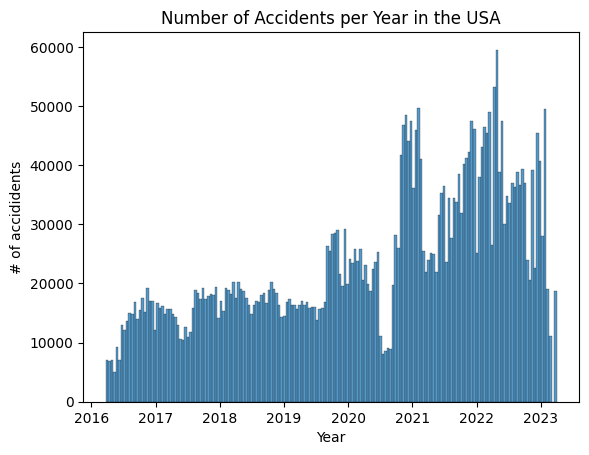

In [49]:
#plotting the distribution of accidents by year
ax = sns.histplot(data=new_df, x=new_df['Start_Time'], bins='auto')
ax.set_title('Number of Accidents per Year in the USA')
ax.set_xlabel('Year')
ax.set_ylabel('# of accididents')
plt.show()

The drop in mid-2020 could be explained by the COVID-19 shutdown, during which many people stayed indoors, resulting in fewer cars on the roads.

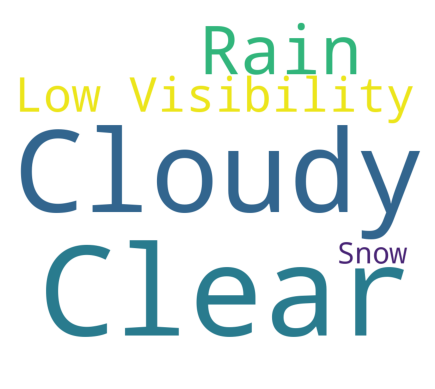

In [50]:
#using a wordcloud to visual the frequency of each word AFTER binning them to 5 categories
data = new_df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(width = 900, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Target variable to binary classification

In [51]:
new_df['Severity'].value_counts()

2    3475276
3     627070
4      55826
1      33566
Name: Severity, dtype: int64

In [52]:
#creating a new column called Binary_Severity to have a binary classification
#Not Severe = 0
#Severe = 1
new_df['Binary_Severity'] = new_df['Severity'].replace({1:0, 2:0, 3:1, 4:1})

In [53]:
#grouping the not severe by states
severity_count_0 = new_df[new_df['Binary_Severity'] == 0].groupby('State').size()
severity_count_0.sort_values(ascending=False)

State
CA    1421391
FL     750332
TX     448745
SC     329700
NC     294010
NY     264664
dtype: int64

In [54]:
#seeing how many severe we have by states
severity_count_1 = new_df[new_df['Binary_Severity'] == 1].groupby('State').size()
severity_count_1.sort_values(ascending=False)

State
CA    279460
TX    124496
FL    115520
NY     79936
SC     44762
NC     38722
dtype: int64

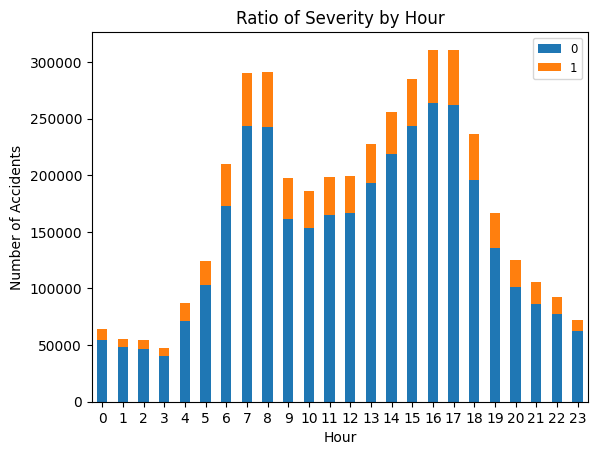

In [55]:
# Extract the hour from the 'Start_Time' column
new_df['Hour'] = new_df['Start_Time'].dt.hour

# Select the relevant columns from the DataFrame
data_to_plot = new_df[['Hour', 'Binary_Severity']]

# Group the data by 'Hour' and 'Binary_Severity' and count the occurrences
grouped_data = data_to_plot.groupby(['Hour', 'Binary_Severity']).size().unstack(fill_value=0)

# Sort the values by the sum of accidents in each hour of the day
hours = grouped_data.sum(axis=1).head(24).index

# Filter the grouped data to include all the hours
grouped_data_hour = grouped_data.loc[hours]

# Create a stacked bar plot
grouped_data_hour.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.title('Ratio of Severity by Hour')

# Rotate the x-axis labels
plt.xticks(rotation=360)

# Set the legend size
plt.legend(fontsize='small')

# Show the plot
plt.show();

### Presence of a Point of Interest (POI)

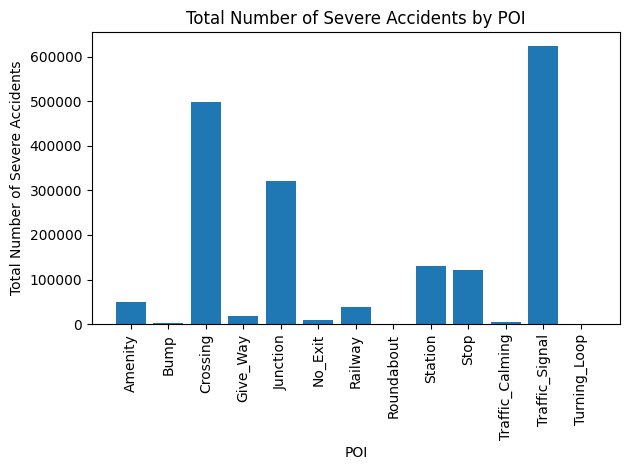

In [56]:
#plotting the total number of accidents by each POI
columns_to_plot = ["Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway",
                   "Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]

#create a new DataFrame with just the binary columns
binary_df = new_df[columns_to_plot]

# Calculate the frequency of each binary value (0 or 1) in each column
binary_counts = binary_df.sum()

#plot
plt.bar(binary_counts.index, binary_counts.values)
plt.xlabel("POI")
plt.ylabel("Total Number of Severe Accidents")
plt.title("Total Number of Severe Accidents by POI")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

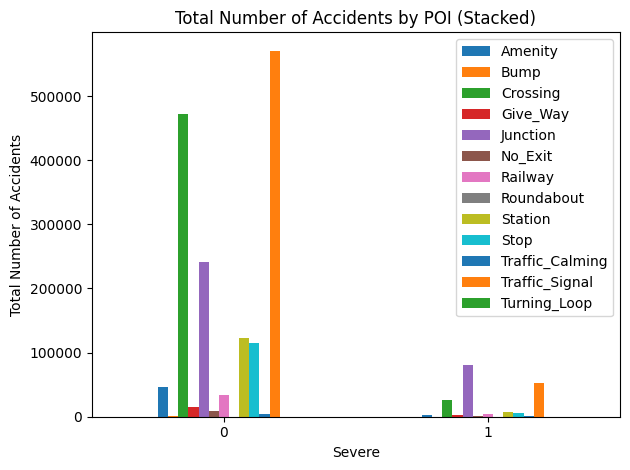

In [57]:
#plotting a stacked bar to show the severity class in each POI column
columns_to_plot = ["Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway",
                   "Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]

# You can create a new DataFrame with just the binary columns
binary_df = new_df[columns_to_plot]

# Calculate the total number of accidents for each POI and severity
grouped_df = binary_df.groupby(new_df['Binary_Severity']).sum()

# Plotting a stacked bar chart
grouped_df.plot(kind='bar', stacked=False)

plt.xlabel("Severe")
plt.ylabel("Total Number of Accidents")
plt.title("Total Number of Accidents by POI (Stacked)")

plt.xticks(rotation=360)  # Rotate x-axis labels by 360 degrees
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

### Showing the individual percentages of each POI's presence in the accidents

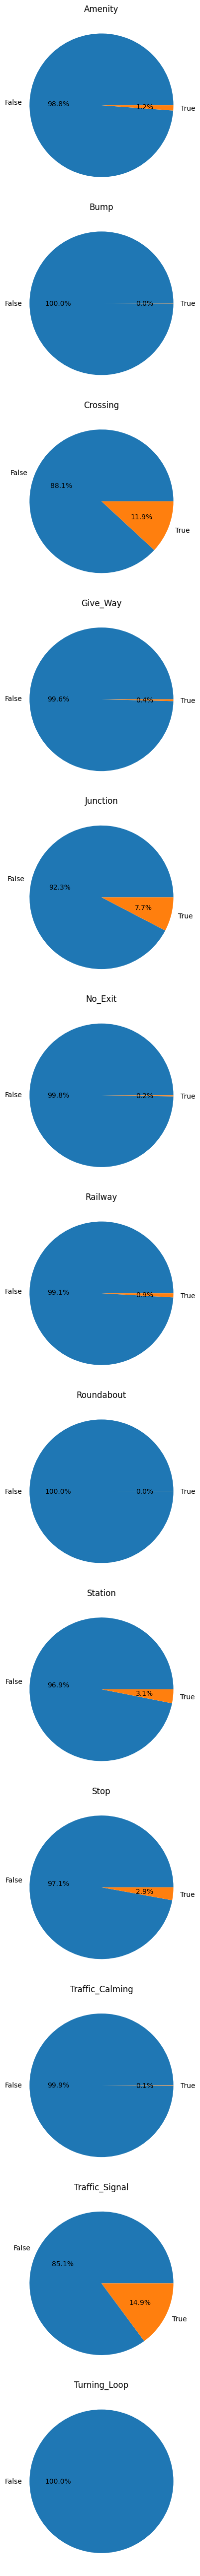

In [58]:
#the columns we want to plot
columns_to_plot = ["Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway",
                   "Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]

# Create a plot with multiple subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(8, 4 * len(columns_to_plot)))

# Iterate through the columns and create a pie chart for each one
for i, col in enumerate(columns_to_plot):
    # Get the value counts for the column
    value_counts = new_df[col].value_counts()

    # Create a pie chart for the column
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%') #decided to use a pie chart since we have only 2 variables
    axes[i].set_title(col)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

Traffic Signal appear to have a larger presence in these accidents compared to the other POIs.

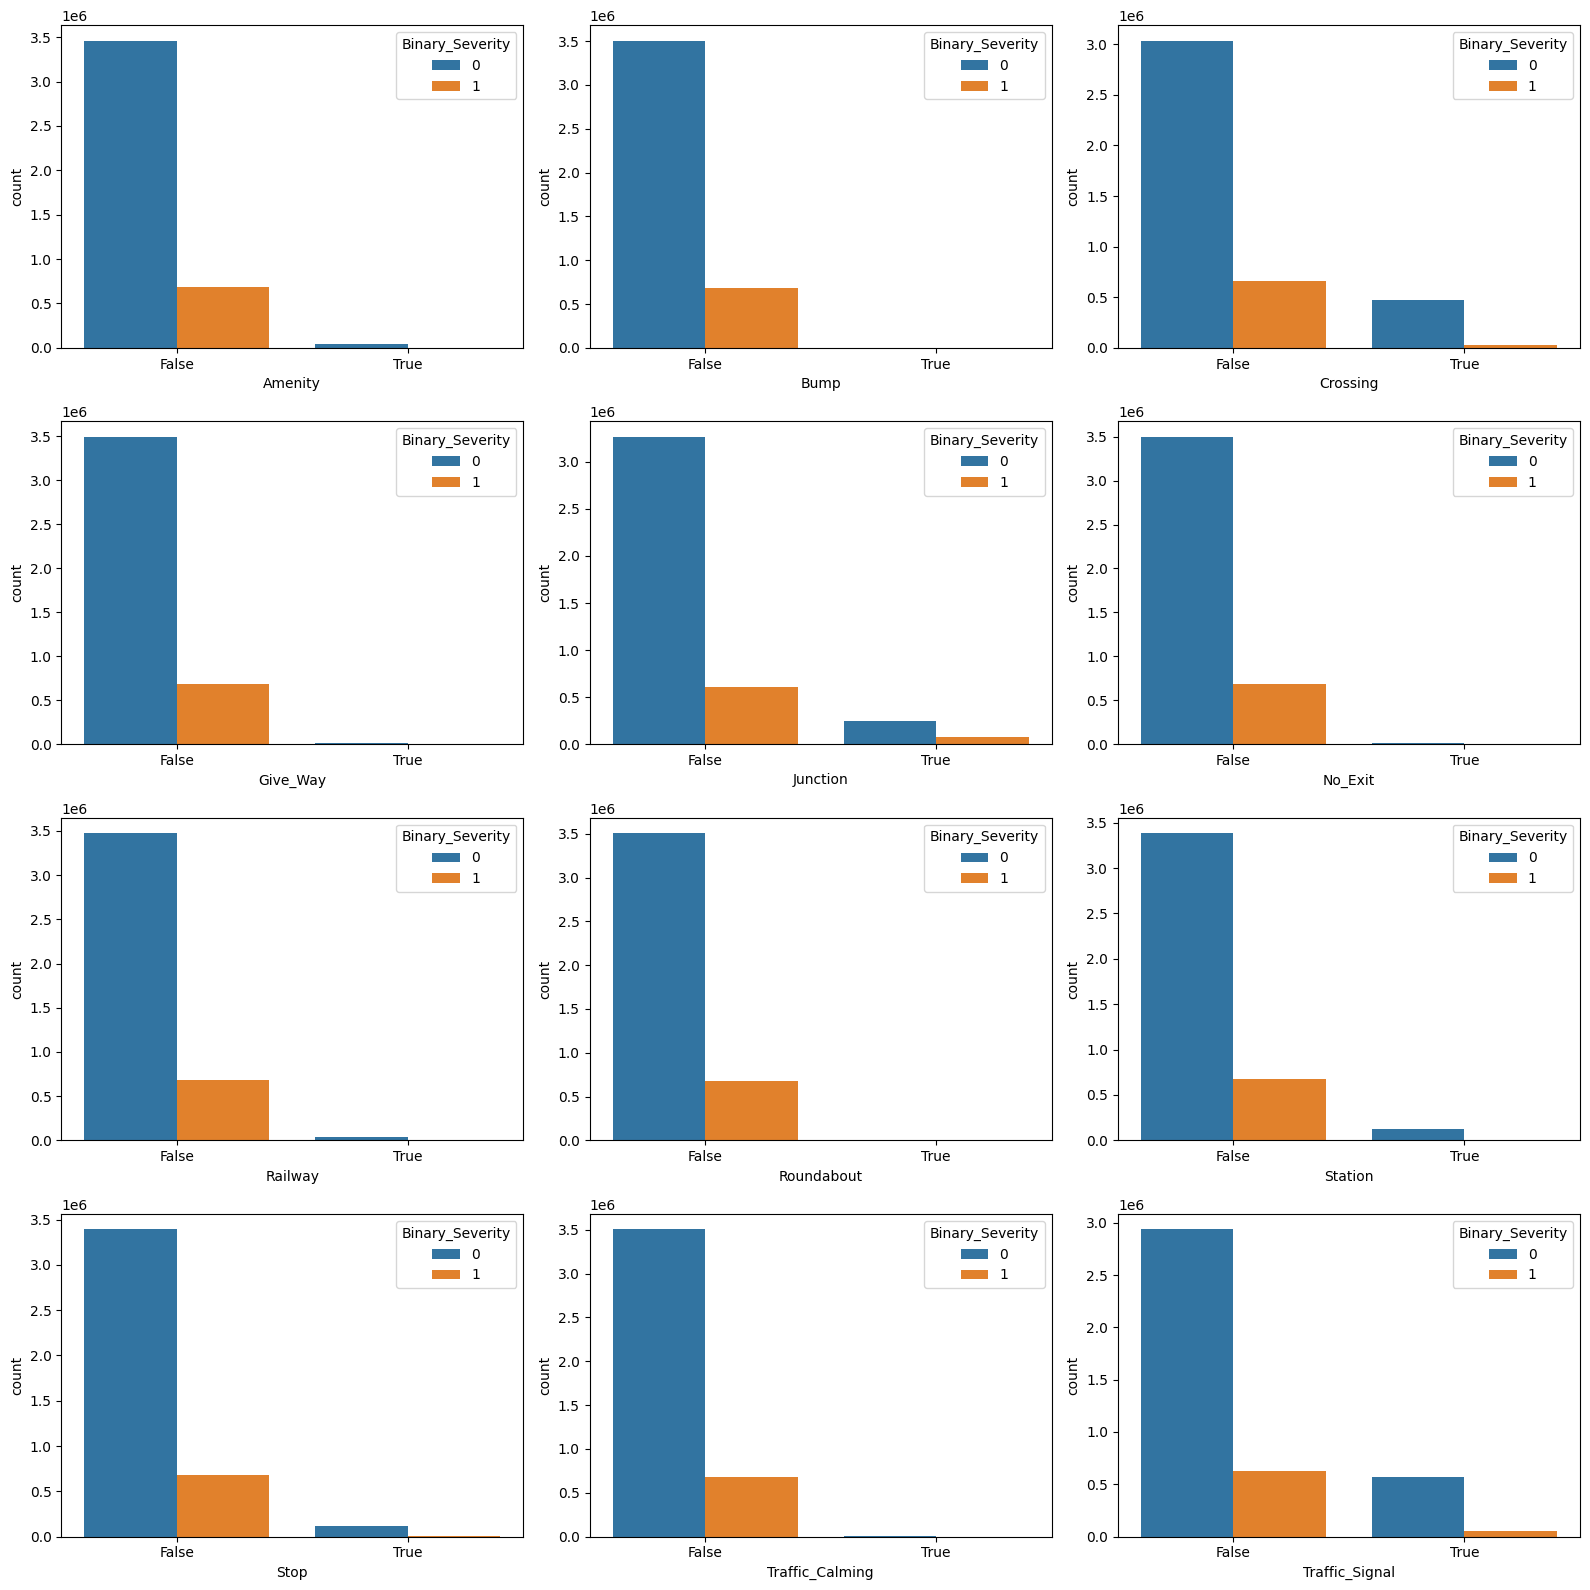

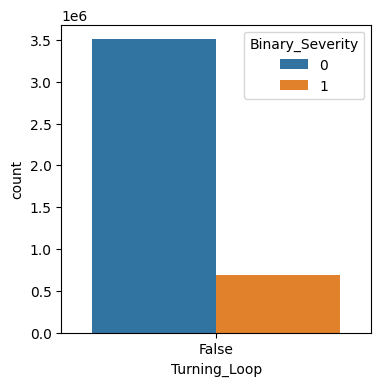

In [59]:
#plotting the severity class to each POI columns
fig, axes = plt.subplots(4, 3, figsize=(16, 16))

ax = sns.countplot(data=new_df, x=new_df["Amenity"], hue=new_df['Binary_Severity'], ax=axes[0,0])
ax = sns.countplot(data=new_df, x=new_df["Bump"], hue=new_df['Binary_Severity'], ax=axes[0,1])
ax = sns.countplot(data=new_df, x=new_df["Crossing"], hue=new_df['Binary_Severity'], ax=axes[0,2])
ax = sns.countplot(data=new_df, x=new_df["Give_Way"], hue=new_df['Binary_Severity'], ax=axes[1,0])
ax = sns.countplot(data=new_df, x=new_df["Junction"], hue=new_df['Binary_Severity'], ax=axes[1,1])
ax = sns.countplot(data=new_df, x=new_df["No_Exit"], hue=new_df['Binary_Severity'], ax=axes[1,2])
ax = sns.countplot(data=new_df, x=new_df["Railway"], hue=new_df['Binary_Severity'], ax=axes[2,0])
ax = sns.countplot(data=new_df, x=new_df["Roundabout"], hue=new_df['Binary_Severity'], ax=axes[2,1])
ax = sns.countplot(data=new_df, x=new_df["Station"], hue=new_df['Binary_Severity'], ax=axes[2,2])
ax = sns.countplot(data=new_df, x=new_df["Stop"], hue=new_df['Binary_Severity'], ax=axes[3,0])
ax = sns.countplot(data=new_df, x=new_df["Traffic_Calming"], hue=new_df['Binary_Severity'], ax=axes[3,1])
ax = sns.countplot(data=new_df, x=new_df["Traffic_Signal"], hue=new_df['Binary_Severity'], ax=axes[3,2])
plt.tight_layout()

plt.figure(figsize=(4, 4))
ax = sns.countplot(data=new_df, x=new_df["Turning_Loop"], hue=new_df['Binary_Severity'])

plt.grid(False)
plt.show()

In [60]:
new_df['Traffic_Signal'].value_counts()

False    3568071
True      623667
Name: Traffic_Signal, dtype: int64

In [61]:
new_df[new_df['Traffic_Signal'] == 1].sort_values(by='Severity', ascending=False)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Month,Binary_Severity,Hour
7119434,A-7168783,4,2020-04-10 18:02:20,2020-04-10 18:32:20,36.008050,-79.805460,0.500,Closed at W Vandalia Rd - Road closed due to a...,Randleman Rd,Greensboro,Guilford,NC,27406-6527,2020-04-10 17:54:00,55.0,55.0,27.0,28.87,10.0,24.577115,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 00:30:00,4,1,18
3936842,A-3966372,4,2022-03-11 18:48:00,2022-03-11 21:30:00,35.231285,-79.016366,0.266,The road is closed near Nursery Rd.,Nursery Rd,Spring Lake,Harnett,NC,28390,2022-03-11 18:46:00,55.0,55.0,94.0,29.67,10.0,24.577115,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,0 days 02:42:00,3,1,18
3937693,A-3967232,4,2022-08-02 08:06:00,2022-08-02 12:04:27,29.600061,-98.276915,1.606,Incident on I-35 SB near ROY RICHARD DR Road c...,Roy Richard Dr,Schertz,Guadalupe,TX,78154,2022-08-02 07:56:00,78.0,78.0,84.0,29.23,10.0,24.577115,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 03:58:27,8,1,8
3937892,A-3967432,4,2022-11-20 15:29:00,2022-11-20 17:46:38,40.732166,-73.686914,0.018,NYSDOT - Region 10: Crash on NY 25 both direct...,Jericho Tpke,New Hyde Park,Nassau,NY,11040-4514,2022-11-20 15:51:00,36.0,25.0,27.0,30.16,10.0,24.577115,0.0,Clear,False,False,False,False,False,False,False,False,True,False,False,True,False,Day,Day,Day,Day,0 days 02:17:38,11,1,15
3940081,A-3969641,4,2022-08-03 16:12:42,2022-08-03 17:27:42,36.333775,-119.292384,0.083,Incident on CA-63 NB near VISALIA Road closed....,N Court St,Visalia,Tulare,CA,93291-4915,2022-08-03 09:56:00,82.0,82.0,47.0,29.61,10.0,24.577115,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 01:15:00,8,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160991,A-7210351,1,2020-03-04 12:48:00,2020-03-04 14:00:00,35.504580,-82.524510,0.000,At Gerber Road - Accident. Left lane closed.,Hendersonville Rd,Asheville,Buncombe,NC,28803-3207,2020-03-04 12:54:00,54.0,54.0,38.0,27.72,10.0,24.577115,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 01:12:00,3,0,12
7159826,A-7209185,1,2020-03-03 13:20:00,2020-03-03 15:00:00,35.502610,-82.523580,0.000,At Gerber Road - Accident. Two lanes closed.,Hendersonville Rd,Asheville,Buncombe,NC,28803-3204,2020-03-03 13:26:00,54.0,54.0,80.0,27.52,10.0,24.577115,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 01:40:00,3,0,13
7159827,A-7209186,1,2020-03-03 13:20:00,2020-03-03 15:00:00,35.502610,-82.523580,0.000,At Gerber Road - Accident. Two lanes closed.,Hendersonville Rd,Asheville,Buncombe,NC,28803-3204,2020-03-03 13:26:00,54.0,54.0,80.0,27.52,10.0,24.577115,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 01:40:00,3,0,13
7158750,A-7208109,1,2020-03-02 22:54:00,2020-03-03 00:54:00,35.395420,-82.505350,0.000,At Naples Rd - Accident. Right lane closed.,Asheville Hwy,Hendersonville,Henderson,NC,28791-9043,2020-03-02 22:54:00,49.0,47.0,86.0,27.68,10.0,24.577115,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night,0 days 02:00:00,3,0,22


In [62]:
#replacing the boolean values for binary number
new_df["Amenity"] = new_df["Amenity"].replace({False:0, True:1})
new_df["Bump"] = new_df["Bump"].replace({False:0, True:1})
new_df["Crossing"] = new_df["Crossing"].replace({False:0, True:1})
new_df["Give_Way"] = new_df["Give_Way"].replace({False:0, True:1})
new_df["Junction"] = new_df["Junction"].replace({False:0, True:1})
new_df["No_Exit"] = new_df["No_Exit"].replace({False:0, True:1})
new_df["Railway"] = new_df["Railway"].replace({False:0, True:1})
new_df["Roundabout"] = new_df["Roundabout"].replace({False:0, True:1})
new_df["Station"] = new_df["Station"].replace({False:0, True:1})
new_df["Stop"] = new_df["Stop"].replace({False:0, True:1})
new_df["Traffic_Calming"] = new_df["Traffic_Calming"].replace({False:0, True:1})
new_df["Traffic_Signal"] = new_df["Traffic_Signal"].replace({False:0, True:1})
new_df["Turning_Loop"] = new_df["Turning_Loop"].replace({False:0, True:1})

### Period of Day

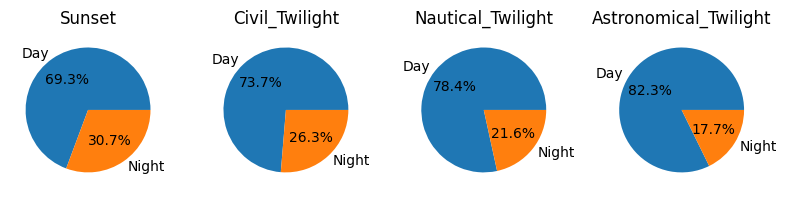

In [63]:
# columns we want to plot
columns_to_plot = ["Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"]

# Create a plot with multiple subplots
fig, axes = plt.subplots(1, 4, figsize=(8, 4 * len(columns_to_plot)))

# Iterate through the columns and create a pie chart for each one
for i, col in enumerate(columns_to_plot):
    # Get the value counts for the column
    value_counts = new_df[col].value_counts()

    # Create a pie chart for the column
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%') #decided to use a pie chart. Interpretable with only 2 variables
    axes[i].set_title(col)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

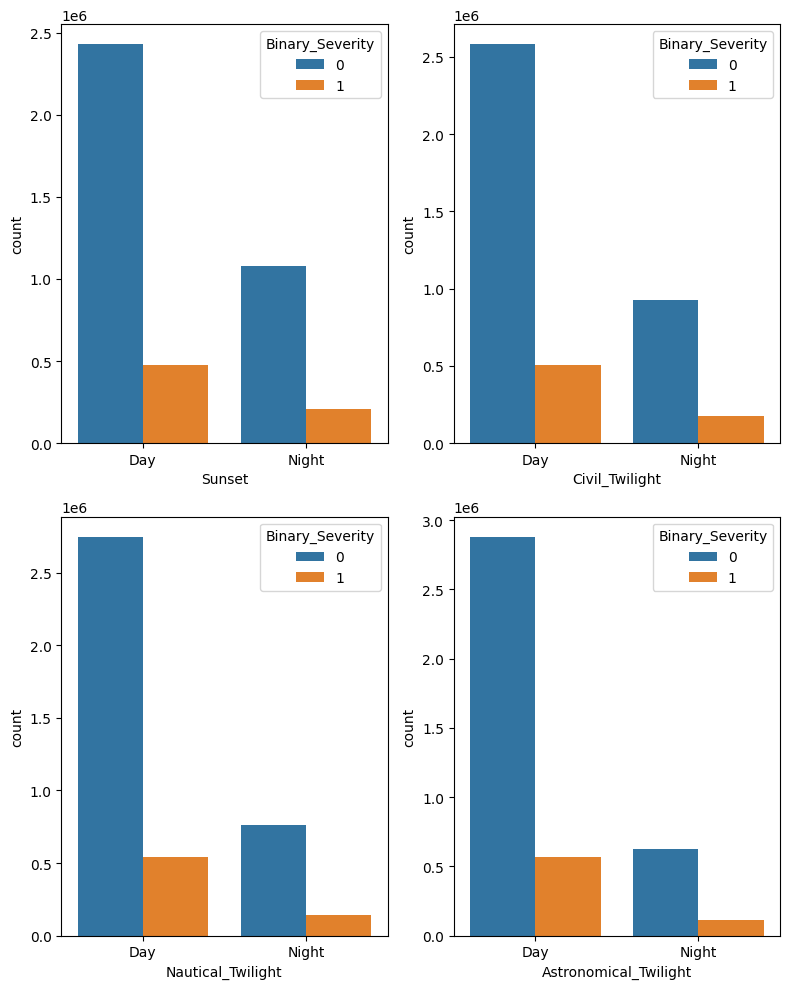

In [64]:
#plotting the severity class to the period of day columns
fig, axes = plt.subplots(2, 2, figsize=(8, 10))

# ax = sns.countplot(data=new_df, x=new_df['Severity'], hue=new_df['Sunset'])
ax = sns.countplot(data=new_df, x=new_df['Sunset'], hue=new_df['Binary_Severity'], ax=axes[0,0])
ax = sns.countplot(data=new_df, x=new_df['Civil_Twilight'], hue=new_df['Binary_Severity'], ax=axes[0,1])
ax = sns.countplot(data=new_df, x=new_df['Nautical_Twilight'], hue=new_df['Binary_Severity'], ax=axes[1,0])
ax = sns.countplot(data=new_df, x=new_df['Astronomical_Twilight'], hue=new_df['Binary_Severity'], ax=axes[1,1])

plt.tight_layout()
plt.grid(False)
plt.show()

In [65]:
#replacing the values to binary
new_df['Sunset'] = new_df['Sunset'].replace({'Day':0, 'Night':1})
new_df['Civil_Twilight'] = new_df['Civil_Twilight'].replace({'Day':0, 'Night':1})
new_df['Nautical_Twilight'] = new_df['Nautical_Twilight'].replace({'Day':0, 'Night':1})
new_df['Astronomical_Twilight'] = new_df['Astronomical_Twilight'].replace({'Day':0, 'Night':1})

### Weather Related

In [66]:
new_df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Month,Binary_Severity,Hour
count,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4191738.0,4.191738e+06,4.191738e+06,4.191738e+06,4.191738e+06,4191738,4.191738e+06,4.191738e+06,4.191738e+06
mean,2.168225e+00,3.367793e+01,-9.830701e+01,4.542853e-01,6.630963e+01,6.472920e+01,6.408485e+01,2.973468e+01,9.187779e+00,2.457712e+01,8.238051e-03,1.166437e-02,4.556582e-04,1.189390e-01,4.097346e-03,7.663265e-02,2.373717e-03,9.088831e-03,3.721607e-05,3.123907e-02,2.896006e-02,1.027020e-03,1.487848e-01,0.0,3.069462e-01,2.630296e-01,2.157456e-01,1.772606e-01,0 days 02:10:52.111258623,6.687166e+00,1.629148e-01,1.240466e+01
std,4.272904e-01,4.288985e+00,1.852345e+01,1.419176e+00,1.557685e+01,1.498851e+01,2.262210e+01,6.134455e-01,2.313712e+00,1.171786e-01,1.033341e-01,1.073700e-01,2.134129e-02,3.237167e-01,6.387925e-02,2.660077e-01,4.866295e-02,9.490114e-02,6.100384e-03,1.739632e-01,1.676943e-01,3.203070e-02,3.558763e-01,0.0,4.612269e-01,4.402784e-01,4.113386e-01,3.818891e-01,2 days 16:38:37.661882863,3.628805e+00,3.692879e-01,5.483158e+00
min,1.000000e+00,2.455480e+01,-1.243750e+02,0.000000e+00,-5.800000e+01,-8.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.001000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0 days 00:01:55,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.024761e+01,-1.182231e+02,0.000000e+00,5.590000e+01,5.900000e+01,4.800000e+01,2.962000e+01,1.000000e+01,2.457712e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0 days 00:33:21,3.000000e+00,0.000000e+00,8.000000e+00
50%,2.000000e+00,3.402556e+01,-9.558344e+01,2.000000e-02,6.710000e+01,6.473455e+01,6.600000e+01,2.990000e+01,1.000000e+01,2.457712e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0 days 01:15:00,7.000000e+00,0.000000e+00,1.300000e+01
75%,2.000000e+00,3.611045e+01,-8.083732e+01,3.360000e-01,7.800000e+01,7.400000e+01,8.300000e+01,3.004000e+01,1.000000e+01,2.457712e+01,8.342249e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0 days 02:06:36,1.000000e+01,0.000000e+00,1.700000e+01
max,4.000000e+00,4.500189e+01,-7.211488e+01,3.336300e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+02,2.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1553 days 01:25:45,1.200000e+01,1.000000e+00,2.300000e+01


In [67]:
#207(F) temperature?
new_df[new_df['Temperature(F)'] == 2.070000e+02]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Month,Binary_Severity,Hour
4208142,A-4239885,2,2023-02-22 19:24:00,2023-02-22 21:32:35,34.066720,-117.238034,0.021,Accident on I-10 W from California St (I-10) t...,I-10 W,Redlands,San Bernardino,CA,92374,2023-02-22 19:54:00,207.0,207.0,64.096165,28.66,7.0,24.577115,0.0,Cloudy,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0 days 02:08:35,2,0,19
4546366,A-4580836,2,2023-02-22 20:10:00,2023-02-23 00:01:38,34.228800,-117.301024,0.417,Accident on CA-18 from N Sierra Way (N Waterma...,Rim of the World Hwy,San Bernardino,San Bernardino,CA,92404,2023-02-22 19:54:00,207.0,207.0,64.096165,28.66,7.0,24.577115,0.0,Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0 days 03:51:38,2,0,20
5029338,A-5067455,4,2023-02-22 19:30:00,2023-02-23 00:00:53,34.228728,-117.251234,0.543,CA-189 is closed from CA-18/Lake Gregory Dr (C...,Lake Gregory Dr,Crestline,San Bernardino,CA,92325,2023-02-22 19:54:00,207.0,207.0,64.096165,28.66,7.0,24.577115,0.0,Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0 days 04:30:53,2,1,19


In [68]:
new_df['Temperature(F)'].value_counts()

77.0     115997
73.0     107569
68.0     104966
75.0     101793
72.0     101241
          ...  
143.6         1
106.2         1
112.8         1
110.8         1
108.7         1
Name: Temperature(F), Length: 687, dtype: int64

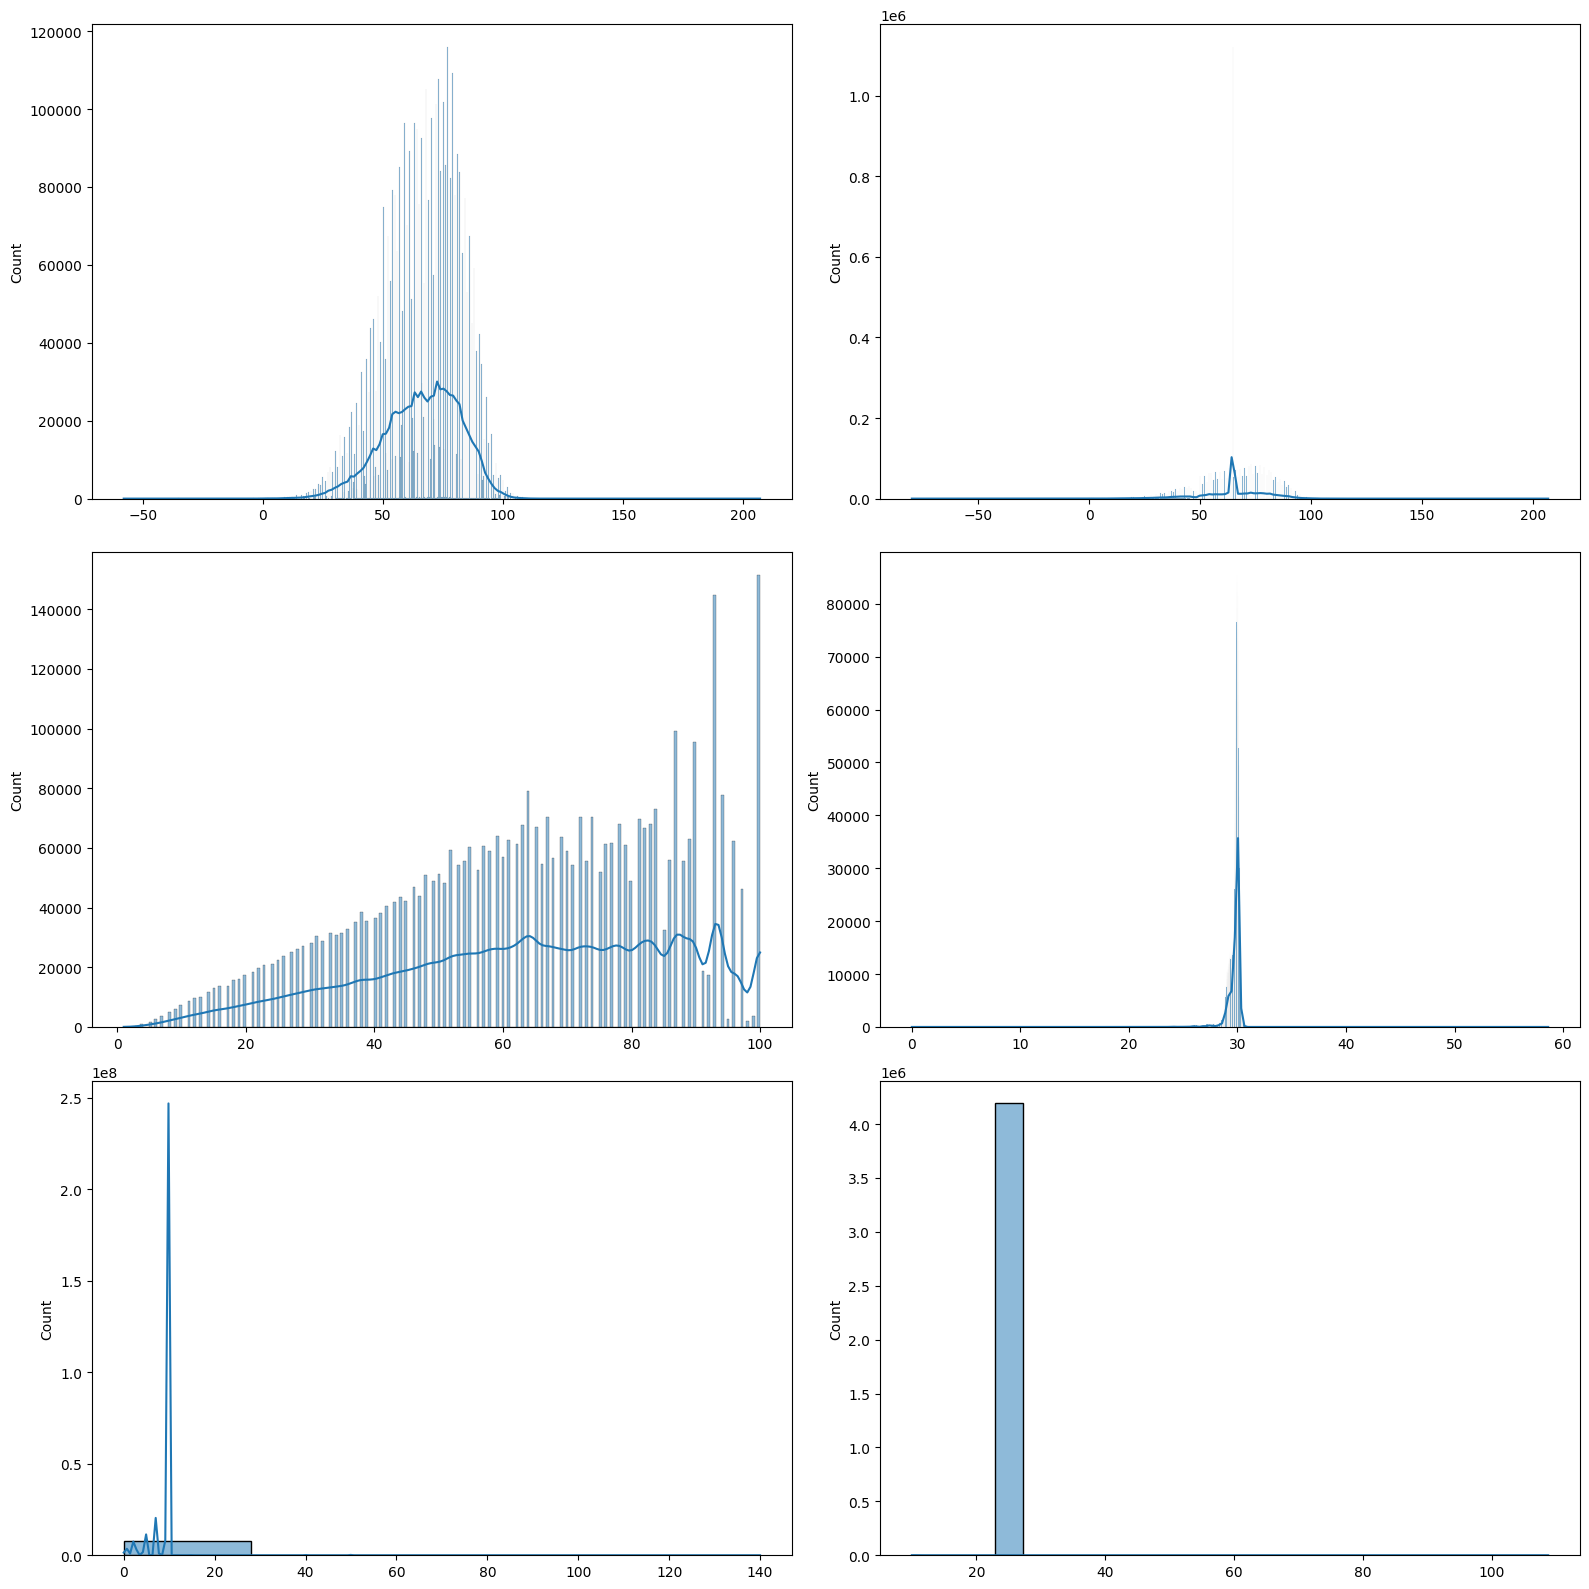

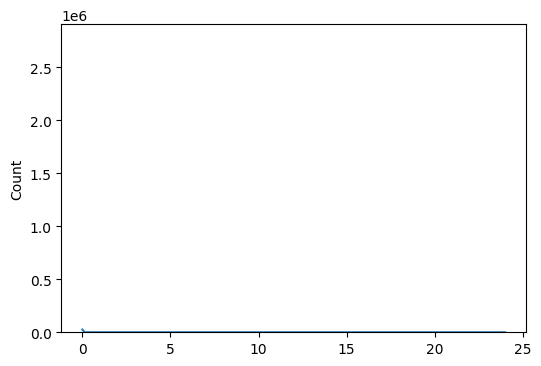

In [69]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

sns.histplot(new_df['Temperature(F)'].values, bins='auto', kde=True, log_scale=False, ax=axes[0,0])
sns.histplot(new_df['Wind_Chill(F)'].values, bins='auto', kde=True, log_scale=False, ax=axes[0,1])
sns.histplot(new_df['Humidity(%)'].values, bins='auto', kde=True, log_scale=False, ax=axes[1,0])
sns.histplot(new_df['Pressure(in)'].values, bins='auto', kde=True, log_scale=False, ax=axes[1,1])
sns.histplot(df['Visibility(mi)'].values, bins= 5, kde=True, log_scale=False, ax=axes[2,0])
sns.histplot(new_df['Wind_Speed(mph)'].values, bins='auto', kde=True, log_scale=False, ax=axes[2,1])
plt.tight_layout()

plt.figure(figsize=(6, 4))
sns.histplot(new_df['Precipitation(in)'].values, bins='auto', kde=True, log_scale=False)

plt.show()

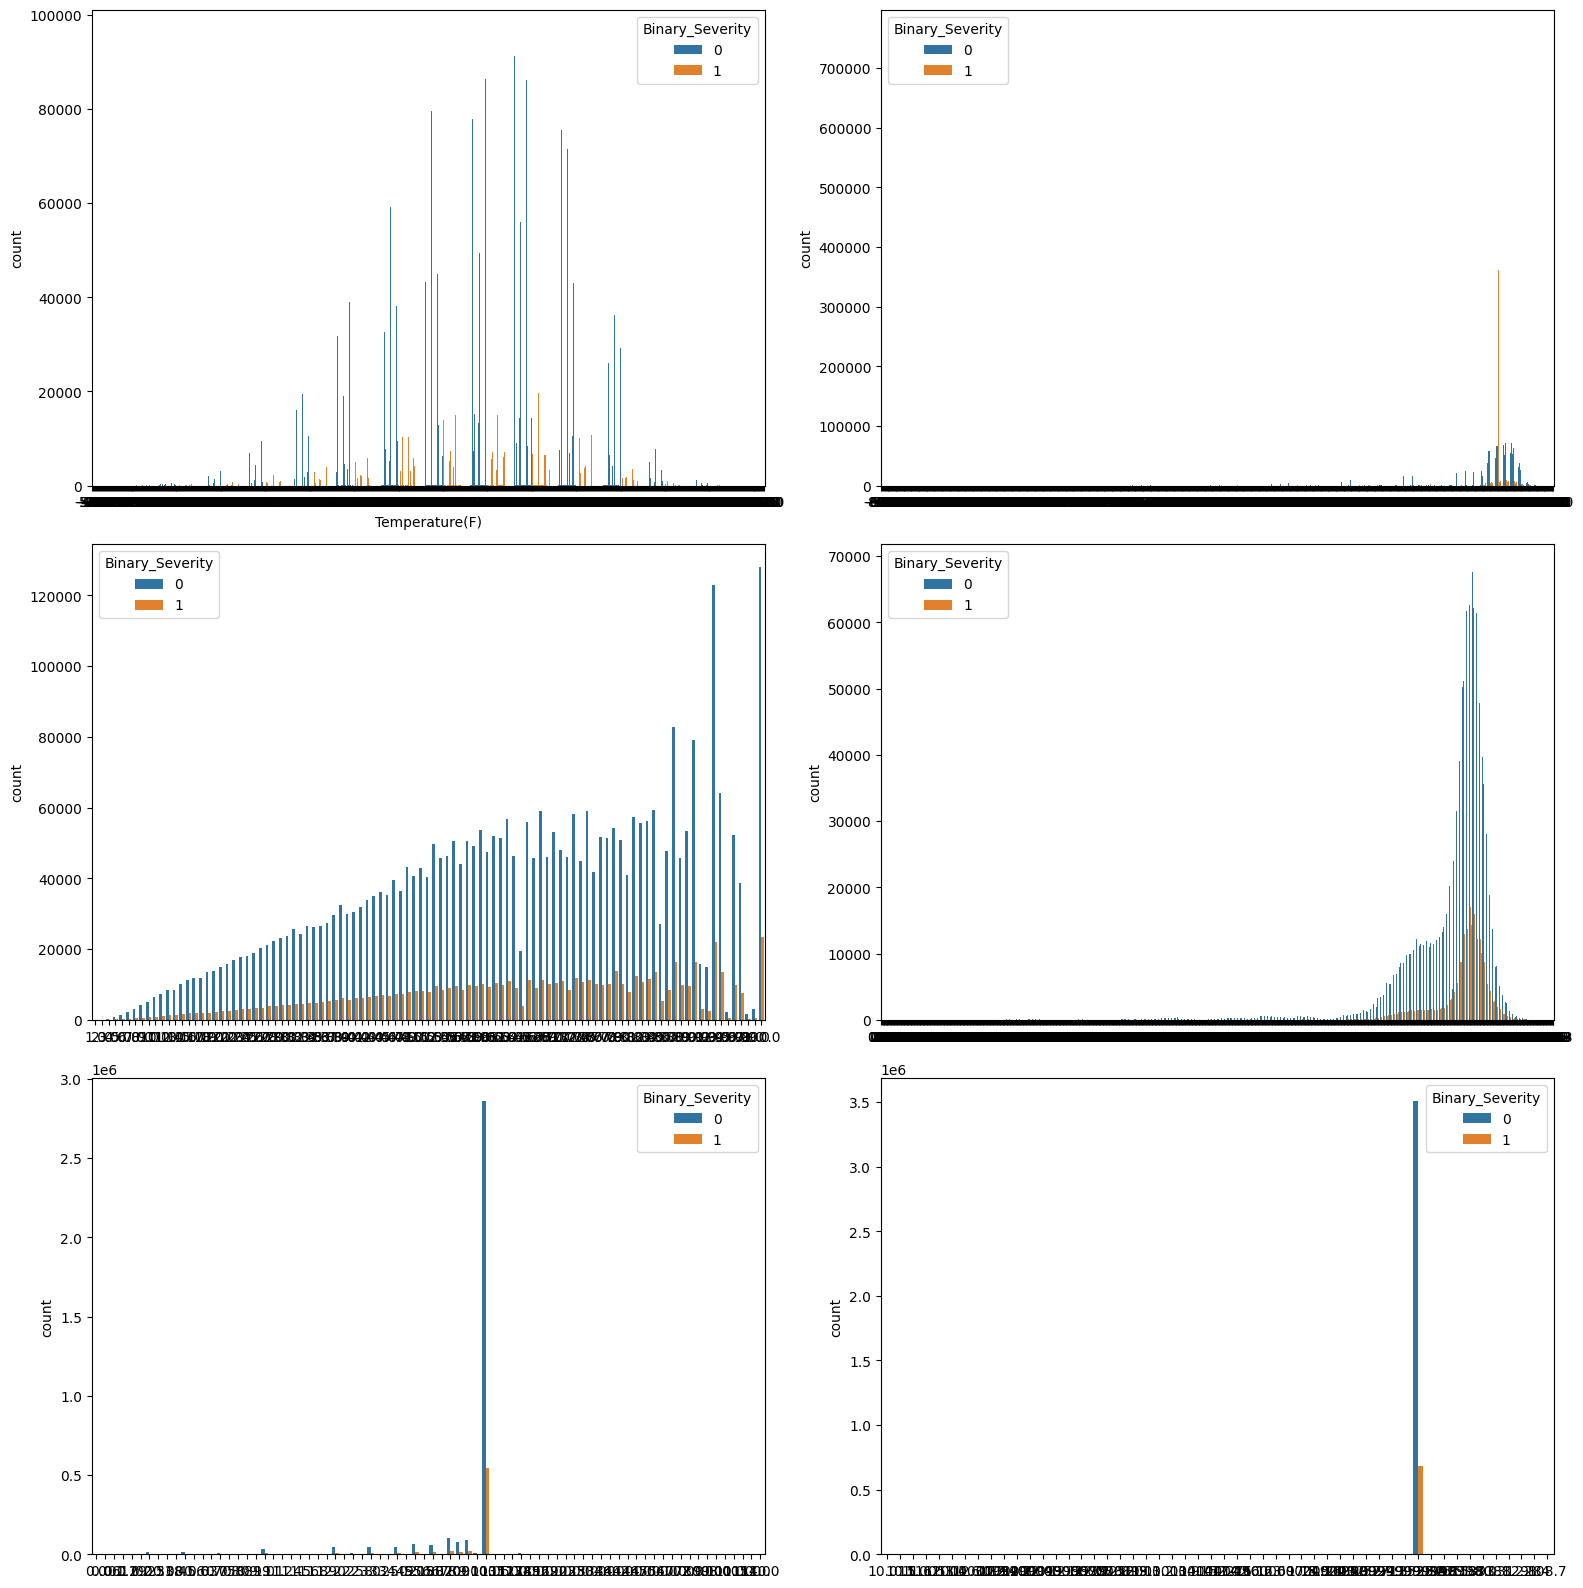

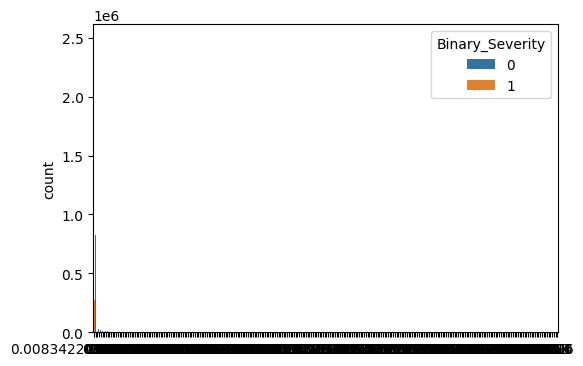

In [70]:
#plotting the severity class to the weather related columns
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# ax = sns.countplot(data=new_df, x=new_df['Severity'], hue=new_df['Sunset'])
ax = sns.countplot(data=new_df, x=new_df['Temperature(F)'], hue=new_df['Binary_Severity'], ax=axes[0,0])
ax = sns.countplot(data=new_df, x=new_df['Wind_Chill(F)'].values, hue=new_df['Binary_Severity'], ax=axes[0,1])
ax = sns.countplot(data=new_df, x=new_df['Humidity(%)'].values, hue=new_df['Binary_Severity'], ax=axes[1,0])
ax = sns.countplot(data=new_df, x=new_df['Pressure(in)'].values, hue=new_df['Binary_Severity'], ax=axes[1,1])
ax = sns.countplot(data=new_df, x=new_df['Visibility(mi)'].values, hue=new_df['Binary_Severity'], ax=axes[2,0])
ax = sns.countplot(data=new_df, x=new_df['Wind_Speed(mph)'].values, hue=new_df['Binary_Severity'], ax=axes[2,1])
plt.tight_layout()
plt.grid(False)

plt.figure(figsize=(6, 4))
sns.countplot(data=new_df, x=new_df['Precipitation(in)'].values, hue=new_df['Binary_Severity'])

plt.show()

In [71]:
# plt.line(new_df['Start_Time'].dt.month, new_df['Precipitation(in)'])
# plt.xlabel('Month')
# plt.ylabel('Precipitation (inches)')
# plt.title('Monthly Precipitation')
# plt.show()

### Duration of Traffic Disruption

In [72]:
# converting the values to hours
new_df['Duration'] = new_df['Duration'].dt.total_seconds() / 3600

In [73]:
new_df['Duration'].describe()

count    4.191738e+06
mean     2.181142e+00
std      6.464379e+01
min      3.194444e-02
25%      5.558333e-01
50%      1.250000e+00
75%      2.110000e+00
max      3.727343e+04
Name: Duration, dtype: float64

The average duration of an accident is one hour and 15 mins.

### One Hot Encoding

In [74]:
# using only California for the modeling
states_to_keep = ['CA']

# Create a new DataFrame by filtering the rows
onehot_df = new_df[new_df['State'].isin(states_to_keep)]

In [75]:
#one hot encoding the weather condition column
onehot_df = pd.get_dummies(onehot_df, columns=['Weather_Condition'], drop_first=True, dtype=int)

In [76]:
onehot_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Month,Binary_Severity,Hour,Weather_Condition_Cloudy,Weather_Condition_Low Visibility,Weather_Condition_Rain,Weather_Condition_Snow
728,A-729,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,0.000,Right hand shoulder blocked due to accident on...,Magazine St,Vallejo,Solano,CA,94591,2016-06-21 10:54:00,75.0,64.73455,48.0,30.00,10.0,24.577115,0.008342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500000,6,1,10,0,0,0,0
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,0.000,Accident on I-880 Northbound at Exit 26 Tennys...,I-880 N,Hayward,Alameda,CA,94544,2016-06-21 10:54:00,75.0,64.73455,48.0,30.06,10.0,24.577115,0.008342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.773056,6,1,10,0,0,0,0
730,A-731,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,0.000,Right lane blocked due to accident on CA-24 We...,I-680 N,Walnut Creek,Contra Costa,CA,94595,2016-06-21 10:53:00,82.9,64.73455,31.0,29.97,10.0,24.577115,0.008342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500000,6,0,10,0,0,0,0
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,0.000,#4 &amp; HOV lane blocked due to accident on I...,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,2016-06-21 10:56:00,75.9,64.73455,48.0,30.04,10.0,24.577115,0.008342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500000,6,1,10,0,0,0,0
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,0.000,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,2016-06-21 09:50:00,75.2,64.73455,41.0,30.06,10.0,24.577115,0.008342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.797222,6,0,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,2019-08-23 17:53:00,86.0,86.00000,40.0,28.92,10.0,24.577115,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.476667,8,0,18,0,0,0,0
7728390,A-7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,2019-08-23 18:53:00,70.0,70.00000,73.0,29.39,10.0,24.577115,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.448056,8,0,19,0,0,0,0
7728391,A-7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,2019-08-23 18:53:00,73.0,73.00000,64.0,29.74,10.0,24.577115,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.474444,8,0,19,1,0,0,0
7728392,A-7777760,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,2019-08-23 18:51:00,71.0,71.00000,81.0,29.62,10.0,24.577115,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.489167,8,0,19,0,0,0,0


In [77]:
#creating a new, smaller csv file
new_df.to_csv('new_df.csv')